# AtliQ Grands Hospitality Domain - Exploratory Data Analysis (EDA)

**Project Goal:** Help AtliQ Grands (a growing hotel chain in India) regain market share and revenue by uncovering actionable insights from booking and occupancy data (May–July 2022).

---

# 📌 Problem Statement

AtliQ Grands owns multiple **luxury** and **business** hotels across four major cities in India:  
**Mumbai | Delhi | Hyderabad | Bangalore**

The company has been facing:
- Declining revenue
- Loss of market share to competitors

**Business Objective:**  
Provide data-driven insights to management on:
- Revenue performance by city, property, room class, and booking platform
- Occupancy trends and utilization
- Cancellation patterns and customer satisfaction
- Opportunities for improvement

**Data Period:** May to July 2022  
**Data Source:** Simulated data warehouse with fact and dimension tables (Star Schema)

# 🛠️ Approach

## 1. **Data Loading & Understanding** – Explored fact vs dimension tables (Star Schema)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
dim_hotels = pd.read_csv('/kaggle/input/atliq-hospitality-my-data/dim_hotels.csv')
dim_rooms = pd.read_csv('/kaggle/input/atliq-hospitality-my-data/dim_rooms.csv')
dim_date = pd.read_csv('/kaggle/input/atliq-hospitality-my-data/dim_date.csv')
fact_aggregated_bookings=pd.read_csv('/kaggle/input/atliq-hospitality-my-data/fact_aggregated_bookings.csv')
fact_bookings=pd.read_csv('/kaggle/input/atliq-hospitality-my-data/fact_bookings.csv')

In [4]:
print("1. dim_hotels")
display(dim_hotels.head())
print(dim_hotels.shape)
print(dim_hotels.info())

print("\n2. dim_rooms")
display(dim_rooms)

print("\n3. dim_date")
display(dim_date.head(10))
print("Date range:", dim_date['date'].min(), "to", dim_date['date'].max())

print("\n4. fact_aggregated_bookings (daily capacity & bookings)")
display(fact_aggregated_bookings.head())
print(fact_aggregated_bookings.shape)

print("\n5. fact_bookings (individual booking details)")
display(fact_bookings.head())
print(fact_bookings.shape)

1. dim_hotels


,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


(25, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes
None

2. dim_rooms


,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential



3. dim_date


,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
5,06-May-22,May 22,W 19,weekeday
6,07-May-22,May 22,W 19,weekend
7,08-May-22,May 22,W 20,weekend
8,09-May-22,May 22,W 20,weekeday
9,10-May-22,May 22,W 20,weekeday


Date range: 01-Jul-22 to 31-May-22

4. fact_aggregated_bookings (daily capacity & bookings)


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


(9200, 5)

5. fact_bookings (individual booking details)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


(134590, 12)


In [5]:
# How many properties (hotels) do we have?
print("Total properties:", dim_hotels['property_id'].nunique())
print("\nCities:")
print(dim_hotels['city'].value_counts())

# Room classes
print('\nRoom classes:')
print(dim_rooms)

# Booking platforms
print('\nBooking platforms in fact_bookings: ')
print(fact_bookings['booking_platform'].value_counts())

# Booking status
print('\n Booking status distributions: ')
print(fact_bookings['booking_status'].value_counts(normalize=True)*100)# in %
print(r"""This means ~41% of bookings come from "others" (probably direct + smaller sites), and MakeMyTrip is the strongest OTA (Online Travel Agent).""")

Total properties: 25

Cities:
city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

Room classes:
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential

Booking platforms in fact_bookings: 
booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

 Booking status distributions: 
booking_status
Checked Out    70.147113
Cancelled      24.830968
No Show         5.021918
Name: proportion, dtype: float64
This means ~41% of bookings come from "others" (probably direct + smaller sites), and MakeMyTrip is the strongest OTA (Online Travel Agent).


## 2. **Data Cleaning** – Handled negative guests, missing capacity, date formats

**1. Check for missing values**

In [6]:
print('Missing values in each tables:')
print("\ndim_hotels: ")
print(dim_hotels.isnull().sum())

print("\ndim_rooms:")
print(dim_rooms.isnull().sum())

print("\ndim_date:")
print(dim_date.isnull().sum())

print("\nfact_aggregated_bookings:")
print(fact_aggregated_bookings.isnull().sum())

print("\nfact_bookings:")
print(fact_bookings.isnull().sum())

Missing values in each tables:

dim_hotels: 
property_id      0
property_name    0
category         0
city             0
dtype: int64

dim_rooms:
room_id       0
room_class    0
dtype: int64

dim_date:
date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

fact_aggregated_bookings:
property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

fact_bookings:
booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


**2. Check for obvious issues (negative guests, weird revenue, etc.)**

In [7]:
# Negative or zero guests?
print("Bookings with no_guests <= 0:")
print(fact_bookings[fact_bookings['no_guests'] <= 0].shape[0])

# Negative revenue?
print('Bookings with negative revenue_generated or realized: ')
print(fact_bookings[(fact_bookings['revenue_generated']<0)|(fact_bookings['revenue_realized']<0)].shape[0])

# Check ratings — should be 1 to 5 or null
print("\nUnique ratings_given values:")
print(sorted(fact_bookings['ratings_given'].unique()))

Bookings with no_guests <= 0:
9
Bookings with negative revenue_generated or realized: 
0

Unique ratings_given values:
[np.float64(1.0), np.float64(nan), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]


**3. Clean the data**

In [8]:
# 1. Fix negative/zero guests - treat as 2 (common fix in this dataset)
fact_bookings.loc[fact_bookings['no_guests'] <=0,'no_guests']=2

# 2. Drop rows with weird revenue (if any - usually none after fix)
fact_bookings = fact_bookings[(fact_bookings['revenue_generated']>0)&(fact_bookings['revenue_realized']>0)]

# 3. Handle capacity missing in fact_aggregated_bookings (some rows have blank capacity)
# We'll fill with median capacity per room_category and property_id
fact_aggregated_bookings['capacity'] = fact_aggregated_bookings.groupby(['property_id', 'room_category'])['capacity'].transform(lambda x: x.fillna(x.median()))

# If still missing (rare), fill with overall median
fact_aggregated_bookings['capacity'].fillna(fact_aggregated_bookings['capacity'].median(), inplace=True)

# 4. Convert dates to proper datetime
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'], format='mixed', dayfirst=True)
fact_bookings['check_in_date']=pd.to_datetime(fact_bookings['check_in_date'],format='mixed',dayfirst=True)
fact_bookings['checkout_date']=pd.to_datetime(fact_bookings['checkout_date'],format='mixed',dayfirst=True)

dim_date['date']=pd.to_datetime(dim_date['date'],format = '%d-%b-%y')

print("Cleaning done!")
print("Final fact_bookings shape:", fact_bookings.shape)

Cleaning done!
Final fact_bookings shape: (134590, 12)


In [9]:
dim_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


## 3. **Data Transformation** – Merged tables and created key metrics (occupancy %, revenue)

**1. Merge fact_aggregated_bookings with dimensions**

In [10]:
# Convert date columns to same datatype before merge
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(
    fact_aggregated_bookings['check_in_date']
)
dim_date['date'] = pd.to_datetime(dim_date['date'])

# Merge to get hotel details and room class
df_agg = fact_aggregated_bookings.merge(dim_hotels, on='property_id', how='left')
df_agg = df_agg.merge(dim_rooms, left_on='room_category', right_on='room_id', how='left')
df_agg = df_agg.merge(dim_date, left_on='check_in_date', right_on='date', how='left')

# Create Occupancy Percentage
df_agg['occ_pct'] = df_agg['successful_bookings'] / df_agg['capacity'] * 100

# Round it nicely
df_agg['occ_pct'] = df_agg['occ_pct'].round(2)

print("df_agg created! Shape:", df_agg.shape)
display(df_agg.head(10))


df_agg created! Shape: (9200, 15)


,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type,occ_pct
0,16559,2022-05-01,RT1,25,30.0,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend,83.33
1,19562,2022-05-01,RT1,28,30.0,Atliq Bay,Luxury,Bangalore,RT1,Standard,2022-05-01,May 22,W 19,weekend,93.33
2,19563,2022-05-01,RT1,23,30.0,Atliq Palace,Business,Bangalore,RT1,Standard,2022-05-01,May 22,W 19,weekend,76.67
3,17558,2022-05-01,RT1,30,19.0,Atliq Grands,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend,157.89
4,16558,2022-05-01,RT1,18,19.0,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,94.74
5,17560,2022-05-01,RT1,28,40.0,Atliq City,Business,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend,70.00
6,19558,2022-05-01,RT1,25,40.0,Atliq Grands,Luxury,Bangalore,RT1,Standard,2022-05-01,May 22,W 19,weekend,62.50
7,19560,2022-05-01,RT1,23,26.0,Atliq City,Business,Bangalore,RT1,Standard,2022-05-01,May 22,W 19,weekend,88.46
8,17561,2022-05-01,RT1,22,26.0,Atliq Blu,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend,84.62
9,16560,2022-05-01,RT1,24,34.0,Atliq City,Business,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,70.59


**2. Merge fact_bookings with dimensions**

In [11]:
df_bookings = fact_bookings.merge(dim_hotels, on='property_id', how='left')
df_bookings = df_bookings.merge(dim_rooms, left_on='room_category', right_on='room_id', how='left')
df_bookings = df_bookings.merge(dim_date, left_on='check_in_date', right_on='date', how='left')

print("df_bookings created! Shape:", df_bookings.shape)
display(df_bookings.head())

df_bookings created! Shape: (134590, 21)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,2.0,RT1,direct online,1.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend


**3. Create Key Metrics**

In [12]:
# 1. Overall Average Occupancy %
avg_occupancy = df_agg['occ_pct'].mean().round(2)
print(f"Overall Average Occupancy: {avg_occupancy}%")

# 2. Occupancy % by City
occ_by_city = df_agg.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)
print("\nOccupancy % by City:")
print(occ_by_city)

# 3. Occupancy % by Room Class
occ_by_room = df_agg.groupby('room_class')['occ_pct'].mean().round(2).sort_values(ascending=False)
print("\nOccupancy % by Room Class:")
print(occ_by_room)

# 4. Total Revenue by City
revenue_by_city = df_bookings.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)
print("\nTotal Revenue by City:")
print(revenue_by_city)

# 5. Revenue by Booking Platform
revenue_by_platform = df_bookings.groupby('booking_platform')['revenue_realized'].sum().sort_values(ascending=False)
print("\nRevenue by Booking Platform:")
print(revenue_by_platform)

# 6. Cancellation Rate
cancellation_rate = (df_bookings['booking_status'] == 'Cancelled').mean() * 100
print(f"\nOverall Cancellation Rate: {cancellation_rate.round(2)}%")

# 7. Average Rating (only where rating given)
avg_rating = df_bookings['ratings_given'].mean().round(2)
print(f"Average Customer Rating: {avg_rating} / 5")

Overall Average Occupancy: 58.4%

Occupancy % by City:
city
Delhi        61.61
Hyderabad    58.14
Mumbai       57.95
Bangalore    56.59
Name: occ_pct, dtype: float64

Occupancy % by Room Class:
room_class
Presidential    59.30
Standard        58.24
Elite           58.04
Premium         58.03
Name: occ_pct, dtype: float64

Total Revenue by City:
city
Mumbai       668640991
Bangalore    420397050
Hyderabad    325232870
Delhi        294500318
Name: revenue_realized, dtype: int64

Revenue by Booking Platform:
booking_platform
others            699353302
makeyourtrip      340834504
logtrip           187554488
direct online     169026467
tripster          123066801
journey           102531334
direct offline     86404333
Name: revenue_realized, dtype: int64

Overall Cancellation Rate: 24.83%
Average Customer Rating: 3.62 / 5


In [13]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type,occ_pct
0,16559,2022-05-01,RT1,25,30.0,Atliq Exotica,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend,83.33
1,19562,2022-05-01,RT1,28,30.0,Atliq Bay,Luxury,Bangalore,RT1,Standard,2022-05-01,May 22,W 19,weekend,93.33
2,19563,2022-05-01,RT1,23,30.0,Atliq Palace,Business,Bangalore,RT1,Standard,2022-05-01,May 22,W 19,weekend,76.67
3,17558,2022-05-01,RT1,30,19.0,Atliq Grands,Luxury,Mumbai,RT1,Standard,2022-05-01,May 22,W 19,weekend,157.89
4,16558,2022-05-01,RT1,18,19.0,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,94.74


# Data Visualization

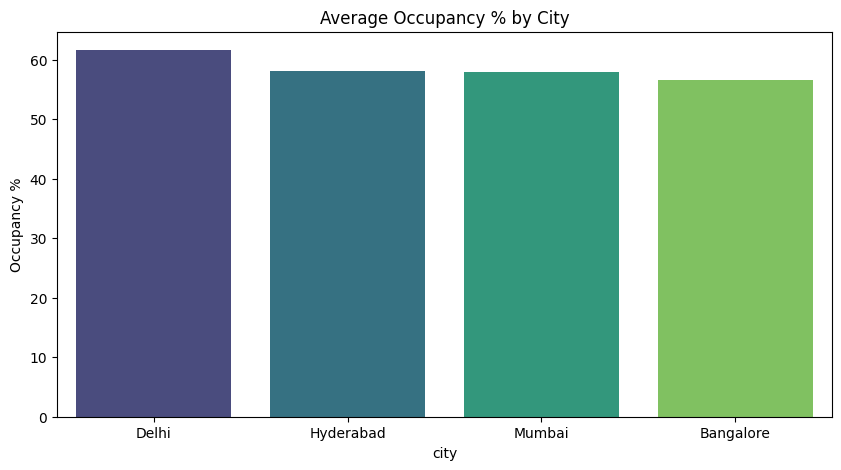

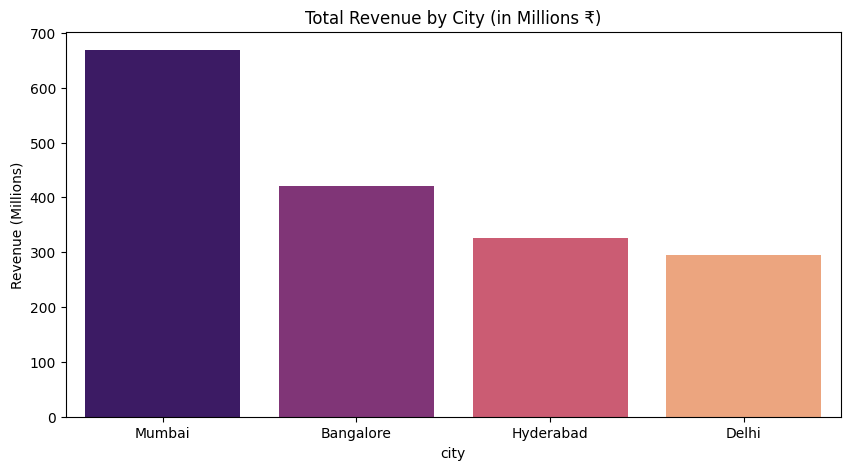

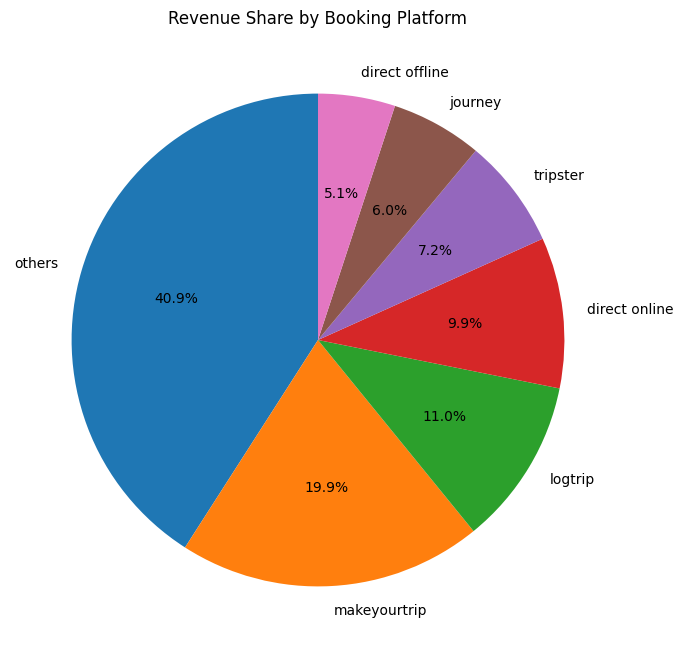

In [14]:
# 1. Occupancy by City
plt.figure(figsize=(10,5))
sns.barplot(x=occ_by_city.index, y=occ_by_city.values, palette='viridis')
plt.title('Average Occupancy % by City')
plt.ylabel('Occupancy %')
plt.show()

# 2. Revenue by City
plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_city.index, y=revenue_by_city.values / 1e6, palette='magma')
plt.title('Total Revenue by City (in Millions ₹)')
plt.ylabel('Revenue (Millions)')
plt.show()

# 3. Revenue by Platform (Pie chart)
plt.figure(figsize=(8,8))
plt.pie(revenue_by_platform.values, labels=revenue_by_platform.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Booking Platform')
plt.show()

In [15]:
display(revenue_by_platform)

booking_platform
others            699353302
makeyourtrip      340834504
logtrip           187554488
direct online     169026467
tripster          123066801
journey           102531334
direct offline     86404333
Name: revenue_realized, dtype: int64

## 💡 Recommendations

1. **Boost Bangalore & Mumbai occupancy** through targeted promotions.
2. **Increase room rates in Delhi** to match its high occupancy.
3. **Reduce cancellations (25%)** → Introduce partial non-refundable options or loyalty incentives.
4. **Strengthen direct channels** ("others" & direct online) → Invest in website and loyalty program.
5. **Partner deeper with MakeMyTrip** – top performing OTA.
6. **Improve guest experience** (rating 3.62) → Focus on low-rated properties.

## 🏆 Conclusion

This EDA reveals clear opportunities for AtliQ Grands to:
- Optimize pricing and inventory
- Reduce cancellations
- Grow high-margin direct bookings
- Improve customer satisfaction

Implementing these insights can help reverse revenue decline and regain market leadership.

**Tools Used:** Python, Pandas, Matplotlib, Seaborn  
**Platform:** Kaggle Notebook

---
**Thank you for viewing my project!**  
Feel free to fork, comment, or connect on LinkedIn. 🚀

# Sets , Dic , list comprehension

## **Use Set to find unique cities**

In [26]:
# Method 1: Using Pandas (common)
unique_cities_pandas = df_bookings['city'].unique()
print("Pandas unique():", unique_cities_pandas)

# Method 2: Using SET (faster for large data, pure Python)
unique_cities_set = set(df_bookings['city'])
print("Using set():", unique_cities_set)
print("Number of unique cities:", len(unique_cities_set))

Pandas unique(): ['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']
Using set(): {'Delhi', 'Mumbai', 'Bangalore', 'Hyderabad'}
Number of unique cities: 4


**List Comprehension – Create New Columns**
Let’s create 3 useful new columns using list comprehensions:

In [32]:
# 1. Revenue category: High if > 15,000 else Low
df_bookings['revenue_category'] = ['high' if revenue > 15000 else 'low' for revenue in df_bookings['revenue_realized'] ]

In [33]:
display(df_bookings.head())

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type,revenue_category
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,2.0,RT1,direct online,1.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,low
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,low
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2.0,RT1,logtrip,5.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,low
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2.0,RT1,others,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,low
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4.0,RT1,direct online,5.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-01,May 22,W 19,weekend,low


## **List Comprehension – Create New Columns**

In [35]:
# 1. Revenue category: High if > 15,000 else Low
df_bookings['revenue_category'] = [
    'High' if revenue > 15000 else 'Low' 
    for revenue in df_bookings['revenue_realized']
]

# 2. Stay length in nights (checkout - check_in)
# First make sure dates are datetime
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'])
df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'])

df_bookings['stay_nights'] = [
    (checkout - checkin).days 
    for checkin, checkout in zip(df_bookings['check_in_date'], df_bookings['checkout_date'])
]

# 3. Booking platform simplified: 'MakeMyTrip' or 'Other'
df_bookings['platform_simple'] = [
    'MakeMyTrip' if platform == 'makeyourtrip' else 'Other'
    for platform in df_bookings['booking_platform']
]

# Preview new columns
df_bookings[['revenue_realized', 'revenue_category', 'stay_nights', 'booking_platform', 'platform_simple']].head(10)

,revenue_realized,revenue_category,stay_nights,booking_platform,platform_simple
0,10010,Low,1,direct online,Other
1,3640,Low,1,others,Other
2,9100,Low,3,logtrip,Other
3,3640,Low,1,others,Other
4,10920,Low,1,direct online,Other
5,9100,Low,2,others,Other
6,3640,Low,5,others,Other
7,9100,Low,2,logtrip,Other
8,9100,Low,1,tripster,Other
9,9100,Low,1,others,Other


## **Dict Comprehension**

In [34]:
# Groupby + mean → then convert to dict using comprehension
city_avg_revenue = {
    city: group['revenue_realized'].mean().round(0)
    for city, group in df_bookings.groupby('city')
}

print("Average revenue per city:")
for city, avg in sorted(city_avg_revenue.items(), key=lambda x: x[1], reverse=True):
    print(f"{city}: ₹{avg:,.0f}")

Average revenue per city:
Mumbai: ₹15,387
Bangalore: ₹13,131
Delhi: ₹12,154
Hyderabad: ₹9,322
